**Name:** Cheng Xianhao

**Matric No:** A0167000X

---

# Experiment Context
The following experiment is conducted using a socket program that resembles the working of a stop-and-wait ARQ using TCP protocol. File to be sent will be broken down into smaller packets to be sent by the client sequentially. At any point in time, the client will only send 1 packet to the server, and the server is required to acknowledge that the packet has been successfully received before the next packet will be sent. 

Whenever a packet has been received by the server, the server will send a acknowledgement pack containing the properties `response` and `packet_no`. `response` indicates if the packet has been successfully received by the server. It returns a value of `0` if the packet that reached the server is not damaged. Otherwise, a value of `1` is returned. `packet_no` indicates the intended packet number that the acknowledgement packet is responding to.

# Assumptions
The following assumptions are made in the experiment and the implementation of the socket program:

1. Data and acknoledgement packets will always be received and will not be lost during transmission. As such, there is no need to account for timeouts. 
2. Error occurs purely because of corrupted data packet received on the server end. Acknowledgement packets received by the client will never be corrupted.
3. Error rate is constant regardless of data unit (MTU). 

# Parameter
The variable parameters are the error rate in percentage and the data unit size (MTU) in bytes. Values used in the experiment are as follows:

Error Rate = `[0, 25, 50, 75]`

MTU = `[50, 125, 250, 500, 750, 1250]`

Throughout the experiment, the file used for sending will be constant having a size of `59792` bytes

Each set of values is repeated 60 times with the average results used for analysis for better accuracy by Central Limit Theorem. 

# Result Analysis
The raw dataset is stored in a csv file. Python's `pandas` and `matplotlib` libraries will be used to analyze the data collected. 

In [3]:
import matplotlib
import numpy as np
import pandas as pd
%matplotlib inline

## Raw Data
The following dataframe contains the raw dataset. A total of 1440 entries are collected.

In [12]:
columns = ["MTU (B)", "Error Rate (%)", "Transfer Time (ms)", "Throughput (KB/s)" ]

raw_df = pd.read_csv('data.csv', usecols=['Data_Unit', 'Error_Rate', 'Time_Elapsed', 'Throughput'])
raw_df.columns = columns
raw_df

,MTU (B),Error Rate (%),Transfer Time (ms),Throughput (KB/s)
0,500,0,57.782,1034.803223
1,500,0,130.127,459.497253
2,500,0,26.028,2297.256836
3,500,0,81.924,729.859375
4,500,0,81.533,733.359497
...,...,...,...,...
1435,125,75,1763.563,33.904659
1436,125,75,1849.961,32.321220
1437,125,75,1843.554,32.433552
1438,125,75,1935.320,30.895666


## Average Value
The average value of transfer time and throughput for each dataset is shown in following dataframe:

In [5]:
df = raw_df.groupby([columns[0], columns[1]]).mean()
df

Transfer Time (ms)  Throughput (KB/s)
MTU (B) Error Rate (%)                                       
50      0                       952.184150          90.380338
        25                     1394.218200          52.300258
        50                     1484.700250          44.749505
        75                     2884.082533          22.579287
125     0                       356.174383         298.051061
        25                      491.084283         199.314058
        50                      767.011567         120.192671
        75                     1677.191567          38.831395
250     0                       145.534267         799.002409
        25                      255.712533         473.822939
        50                      391.946217         264.960033
        75                      910.368267          90.415963
500     0                        74.139067        1741.184244
        25                      114.806350        1316.541977
        50                      193.879783         617.844294
        75                      406.644833         251.306561
750     0                        51.776383        3372.277000
        25                       62.176633        2293.896168
        50                      103.051250        1332.202789
        75                      288.671433         408.361066
1250    0                        30.699433        4914.997768
        25                       34.057133        3604.145757
        50                       62.452983        2303.026537
        75                      129.896467         855.004706

## Result 1: Transfer Time Increases With Error Rate

From the following graph, it can be seen that the transfer time increases with error rate. The increase in transmission time is likely due to the fact that an increase in error rate will result in the more data packets being retransmitted. 

It is worth noting that the rate of increase in transfer time is greater as the error rate increased beyond 50%.

Text(0, 0.5, 'Time Elapsed (ms)')

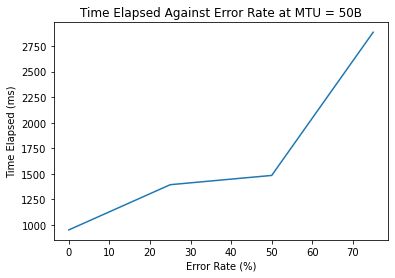

In [101]:
df.xs(50, level=columns[0])[columns[2]].plot(title="Transfer Time Against Error Rate at MTU = 50B").set_ylabel(columns[2])

## Result 2: Throughput Decreases With Error Rate

From the following graph, we can see that there is a decrease in throughput when the error rate increases. This is likely due to the longer transmission time required as a result of an increase in retransmission. 

Text(0, 0.5, 'Throughput (KB/s)')

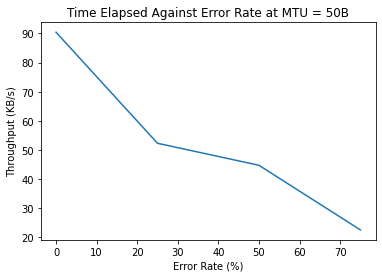

In [148]:
df.xs(50, level=columns[0])[columns[3]].plot(title="Time Elapsed Against Error Rate at MTU = 50B").set_ylabel(columns[3])

## Result 3: MTU's Effect On Increase/Decrease Rate

While there is a general trend that transfer time is directly proportional to error rate, and throughput is inverse proportional to error rate, there is an interesting phenomenon on how MTU has effects on the rate of those changes.

In the following graph, it can be seen the absolute increase in transfer time between error rate at 75% and error rate at 0% is greater for MTU with size of 50 bytes as compared to that of MTU with size of 1250 bytes, where the increase in transfer time is largely insignificant. This can be attributed to the fact that smaller MTUs have greater overheads, and an increase in error rate will place additional overheads to smaller MTUs. 

Text(0, 0.5, 'Transfer Time (ms)')

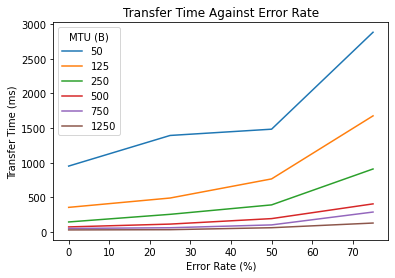

In [33]:
df_time = df[columns[2]].unstack()
df_time.T.plot(title="Transfer Time Against Error Rate").set_ylabel(columns[2])

For the throughput, rate of decrease in throughput as the error rate increases is directly proportional to the MTU size. In the graph below, the absolute decrease in throughput between error rate at 0% and error rate at 75% for MTU of size 1250 bytes is greater than that of MTU of size 50 bytes.

Text(0, 0.5, 'Throughput (KB/s)')

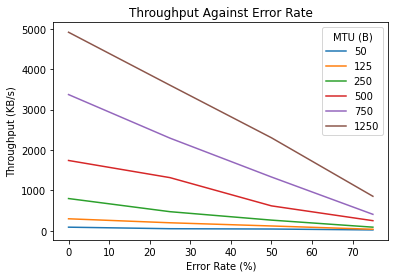

In [34]:
df_throughput = df[columns[3]].unstack()
df_throughput.T.plot(title="Throughput Against Error Rate").set_ylabel(columns[3])

This can be attributed to larger MTUs having larger variation in transfer time. The table below shows the minimum transfer time and the maximum transfer time (on the right) of MTU of size 50 bytes and 1250 bytes. Notice that in general, for MTU size of 1250 bytes, the maximum transfer time is at least 40 times that of the minimum. For an MTU size of 50 bytes, the maximum transfer time is at most 6 times that of the minimum time. As a result, there is a greater fluctation in throughput as MTU size increases. The reason for this is probably due to the fact that larger MTU occupies slow link for a longer period of time, delaying subsequent transmission of subsequent packets and increasing delay variation (see: https://en.wikipedia.org/wiki/Maximum_transmission_unit#Tradeoffs).

In [35]:
min_df = raw_df.groupby([columns[0], columns[1]]).min()[columns[2]]
min_df.name = "Min Transfer Time (ms)"

max_df = raw_df.groupby([columns[0], columns[1]]).max()[columns[2]]
max_df.name = "Max Transfer Time(ms)"

pd.concat([min_df, max_df], axis=1, join="inner").loc[[50, 1250]]

Min Transfer Time (ms)  Max Transfer Time(ms)
MTU (B) Error Rate (%)                                               
50      0                              315.205               1969.222
        25                             466.164               2619.120
        50                            1006.185               2721.540
        75                            2022.916               6761.343
1250    0                                4.466               1015.037
        25                               6.853               1015.242
        50                              10.140               1025.972
        75                              23.302               1097.002

## Result 4: Transfer Time Decreases With MTU

From the following graph, we can see that regardless of the error rate, transfer time decreases exponentially as MTU size increases. This makes sense since lesser packets need to be transmitted, reducing the overhead inccured from the additional packets.

Text(0, 0.5, 'Transfer Time (ms)')

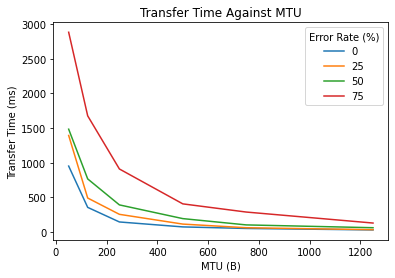

In [37]:
df_mtu = df
df_mtu[columns[2]].unstack().plot(title="Transfer Time Against MTU").set_ylabel(columns[2])

## Result 5: Throughput Increases With MTU

From the following graph, we can see that regardless of the error rate, throughput generally increases with MTU size. This is because the transfer time reduces as MTU size increases, resulting in lower throughput. 

Text(0, 0.5, 'Throughput (KB/s)')

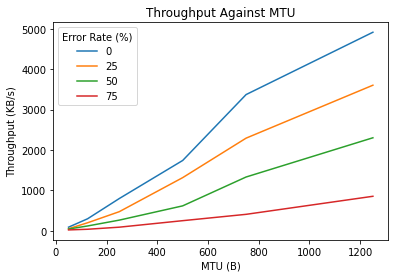

In [38]:
df_mtu[columns[3]].unstack().plot(title="Throughput Against MTU").set_ylabel(columns[3])